In [1]:
# Analysis terms: [ai/art. intell., machine learning, algorithm]

project = "algorithm"

import pandas

from web_observatory import start_project
start_project(project)

Done!


In [2]:
# Get tweets about AI/ML in nature conservation (Historical focus)
from web_observatory import search_twitter
algo_twitter = search_twitter(q = 'conservation (algorithms OR algorithmic) has:links', project=project)

{'query': 'conservation (algorithms OR algorithmic) has:links', 'tweet.fields': 'created_at,entities,public_metrics', 'max_results': 100, 'start_time': '2006-03-21T00:00:00.00Z', 'end_time': '2022-01-01T00:00:00.00Z'}
Done!


In [3]:
# Get Google results about AI/ML in nature conservation (Relevance)
from web_observatory import search_google
algo_google = search_google(q = 'nature conservation algorithm', project = project)

Done


In [4]:
# Compile results
from web_observatory import twitter_process 
twitter = twitter_process(project=project)
from web_observatory import google_process
google = google_process(datatype = "CSV", project=project)

In [5]:
# Extract organizations from Twitter/Google results
from web_observatory import get_domains
twitter = get_domains(twitter)
google = get_domains(google)
twitter.groupby(by="domain").count().sort_values(by="link", ascending=False).head(20)
google.groupby(by="domain").count().sort_values(by="link", ascending=False).head(20)

,date,link,metrics,source,query
domain,,,,,
wiley,0,5,0,5,5
sagepub,0,2,0,2,2
nih,0,2,0,2,2
amazon,0,1,0,1,1
springer,0,1,0,1,1
researchgate,0,1,0,1,1
sciencedirect,0,1,0,1,1
scitation,0,1,0,1,1
scitechdaily,0,1,0,1,1


In [ ]:
# Process all data together 
from web_observatory import search_merge
pages = search_merge(twitter = twitter, google = google, project = project)
pages

In [20]:
# Manage duplication of links here....
## Load previous "all_search_results"
previous = pandas.read_csv("AI_ML/all_search_results.csv")
## De-duplicate from this list of pages where there is a match on previous search
pages = pages[~pages["link"].isin(previous["link"])]
pages

,date,link,metrics,source,query,domain
0,2011-08-27T05:07:41.000Z,http://amzn.to/qOpv8k,0.0,Twitter,conservation (algorithms OR algorithmic) has:l...,amzn
1,2011-11-02T03:23:01.000Z,http://lnk.co/HL2EX,0.0,Twitter,conservation (algorithms OR algorithmic) has:l...,lnk
2,2011-11-05T10:07:25.000Z,http://amzn.to/ualRkq,0.0,Twitter,conservation (algorithms OR algorithmic) has:l...,amzn
3,2011-11-24T05:05:58.000Z,http://bit.ly/vLUoyA,0.0,Twitter,conservation (algorithms OR algorithmic) has:l...,bit
4,2011-12-22T08:46:02.000Z,http://amzn.to/t8LXDS,0.0,Twitter,conservation (algorithms OR algorithmic) has:l...,amzn
...,...,...,...,...,...,...
42,NaN,https://cran.r-project.org/web/packages/priori...,NaN,Google,nature conservation algorithm,r-project
43,NaN,https://www.mdpi.com/1424-8220/19/3/553,NaN,Google,nature conservation algorithm,mdpi
44,NaN,http://files.eric.ed.gov/fulltext/ED193078.pdf,NaN,Google,nature conservation algorithm,ed
47,NaN,https://www.nrcs.usda.gov/wps/portal/nrcs/main...,NaN,Google,nature conservation algorithm,usda


In [25]:
# Get Twitter archives
#pages = pandas.read_csv("algorithm/all_search_results.csv")
from web_observatory import get_versions
results = get_versions(pages, project = project)
results

/Users/enost/Downloads/observatory_dev_v02.py:693: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pages["full_url"] = None # The actual url and not some bit.ly url
/Users/enost/Downloads/observatory_dev_v02.py:694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pages["url_meta"] = None # Possible additional information
/Users/enost/Downloads/observatory_dev_v02.py:695: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

,index,date,link,metrics,source,query,domain,full_url,url_meta,wm_url,wm_meta
0,0,2011-08-27T05:07:41.000Z,http://amzn.to/qOpv8k,0.0,Twitter,conservation (algorithms OR algorithmic) has:l...,amzn,https://www.amazon.com/Symmetries-Partial-Diff...,None,http://web.archive.org/web/20130704004148id_/h...,No Time-of-Tweet Versions; Got Older Version
1,1,2011-11-02T03:23:01.000Z,http://lnk.co/HL2EX,0.0,Twitter,conservation (algorithms OR algorithmic) has:l...,lnk,http://lnk.co/HL2EX,None,http://web.archive.org/web/20110915112900id_/h...,Time-of-Tweet Version
2,2,2011-11-05T10:07:25.000Z,http://amzn.to/ualRkq,0.0,Twitter,conservation (algorithms OR algorithmic) has:l...,amzn,https://www.amazon.com/Symmetries-Partial-Diff...,None,http://web.archive.org/web/20130704004148id_/h...,No Time-of-Tweet Versions; Got Older Version
3,3,2011-11-24T05:05:58.000Z,http://bit.ly/vLUoyA,0.0,Twitter,conservation (algorithms OR algorithmic) has:l...,bit,https://www.freelancer.com/projects/PHP-Javasc...,None,http://web.archive.org/web/20111228103051id_/h...,No Time-of-Tweet Versions; Got Older Version
4,4,2011-12-22T08:46:02.000Z,http://amzn.to/t8LXDS,0.0,Twitter,conservation (algorithms OR algorithmic) has:l...,amzn,https://www.amazon.com/Symmetries-Partial-Diff...,None,http://web.archive.org/web/20130704004148id_/h...,No Time-of-Tweet Versions; Got Older Version
...,...,...,...,...,...,...,...,...,...,...,...
232,42,NaN,https://cran.r-project.org/web/packages/priori...,NaN,Google,nature conservation algorithm,r-project,https://cran.r-project.org/web/packages/priori...,None,None,Not historical
233,43,NaN,https://www.mdpi.com/1424-8220/19/3/553,NaN,Google,nature conservation algorithm,mdpi,https://www.mdpi.com/1424-8220/19/3/553,None,None,Not historical
234,44,NaN,http://files.eric.ed.gov/fulltext/ED193078.pdf,NaN,Google,nature conservation algorithm,ed,https://files.eric.ed.gov/fulltext/ED193078.pdf,None,None,Not historical
235,47,NaN,https://www.nrcs.usda.gov/wps/portal/nrcs/main...,NaN,Google,nature conservation algorithm,usda,https://www.nrcs.usda.gov/wps/portal/nrcs/main...,None,None,Not historical


In [26]:
# Scrape pages
## Initialize / De-duplicate full urls
#results = pandas.read_csv(project+"/page_versions_full.csv")
from web_observatory import initialize_scrape
urls = initialize_scrape(versions = results, project = project) 

Done!


/Users/enost/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1681: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = empty_value
/Users/enost/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/Users/enost/Downloads/observatory_dev_v02.py:843: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

In [28]:
%cd digcon_scraper/digcon_scraper/
from web_observatory import scrape
scrape(urls)

/Users/enost/Downloads/digcon_scraper/digcon_scraper


2022-06-27 13:43:08 [py.warnings] WARNING: /Users/enost/opt/anaconda3/lib/python3.9/site-packages/scrapy/extensions/feedexport.py:289: ScrapyDeprecationWarning: The `FEED_URI` and `FEED_FORMAT` settings have been deprecated in favor of the `FEEDS` setting. Please see the `FEEDS` setting docs for more details
  exporter = cls(crawler)



2022-06-27 13:43:10 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://onlinelibrary.wiley.com/resolve/doi> (failed 3 times): 503 Service Unavailable


2022-06-27 13:43:17 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://besjournals.onlinelibrary.wiley.com/doi/abs/10.1111/2041-210x.13264> (failed 3 times): 503 Service Unavailable


2022-06-27 13:43:20 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://www.linkedin.com/leap/r> (failed 3 times): 502 Bad Gateway


2022-06-27 13:43:24 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://www.cell.com/one-earth/fulltext/s2590-3322(21)00292-x> (failed 3 times): 503 Service Unavailable


2022-06-27 13:43:26 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://journals.sagepub.com/doi/abs/10.1177/0309132517740220> (failed 3 times): 503 Service Unavailable


2022-06-27 13:43:27 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://journals.sagepub.com/doi/full/10.1177/0309132517740220> (failed 3 times): 503 Service Unavailable


2022-06-27 13:43:27 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://agupubs.onlinelibrary.wiley.com/doi/abs/10.1002/2016wr019987> (failed 3 times): 503 Service Unavailable
2022-06-27 13:43:27 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://onlinelibrary.wiley.com/doi/abs/10.1111/gcb.12736> (failed 3 times): 503 Service Unavailable
2022-06-27 13:43:27 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://conbio.onlinelibrary.wiley.com/doi/10.1111/cobi.13680> (failed 3 times): 503 Service Unavailable


2022-06-27 13:43:27 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://www.cambridge.org/core/journals/oryx/article/conservation-by-algorithm/45af526d27e654d4fe18a766fddfe9c8> (failed 3 times): 500 Internal Server Error
2022-06-27 13:43:27 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://aip.scitation.org/doi/10.1063/1.4931597> (failed 3 times): 503 Service Unavailable


2022-06-27 13:43:28 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://esajournals.onlinelibrary.wiley.com/doi/10.1890/14-1464.1> (failed 3 times): 503 Service Unavailable


2022-06-27 13:43:28 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://www.pnas.org/doi/10.1073/pnas.1813051115> (failed 3 times): 503 Service Unavailable


2022-06-27 13:43:30 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://ieeexplore.ieee.org/document/7438882> (failed 3 times): 503 Service Unavailable


In [30]:
%cd ..

/Users/enost/Downloads


In [31]:
# Quality control
from web_observatory import query
## Create a copy of the text table
query("copy") # Only need to do this once!
## Remove from db where there was no text scraped
query("filter_empty")
## Remove anything without at least 1 keyword?
queryterms = ["artificial intelligence", "machine learning", "nature ", "conservation ", "algorithm"] # spaces to avoid certain spam...
query("filter_words", terms = queryterms) ## TBD: Need to remove French-language sites?

Done!
Done!
Done!


In [32]:
## Get word counts
from web_observatory import query
tech_terms = ["artificial intelligence", " ai ", "machine learning", "algorithm"] # Spaces in ai to capture its use as in AI rather than e.g. said
cons_terms = ["conservation", "nature"]
#grammar = ["is", "will"] # for phrases
topics = ["forest", "mountain", "wetland", "boreal", "ocean", "river", "arctic"]
ethics = ["privacy", "surveillance", "cost"]
tools = ["market", "decision making", "working land", "indigenous-led", "easement"]
combined_terms = tech_terms + cons_terms + topics + ethics + tools

words = query("get_words", combined_terms)
words

,url,domain,source,date,artificial intelligence,ai,machine learning,algorithm,conservation,nature,...,river,arctic,privacy,surveillance,cost,market,decision making,working land,indigenous-led,easement
0,http://web.archive.org/web/20140731104236id_/h...,chesterfieldpost,Twitter,2011-36,0,0,0,0,4,0,...,4,0,1,0,3,1,0,0,0,0
1,https://etienne34-blog.tumblr.com/post/1664008...,tumblr,Twitter,2012-04,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,http://web.archive.org/web/20110828190407id_/h...,harriscompanyrec,Twitter,2011-36,0,1,0,0,0,2,...,0,0,0,0,0,3,0,0,0,1
3,http://web.archive.org/web/20121114210812id_/h...,webcaviste,Twitter,2011-40,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,https://www.freelancer.com/projects/machine-le...,freelancer,Twitter,2012-16,0,0,2,0,6,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24805,http://web.archive.org/web/20220430003951id_/h...,biorxiv,Twitter,2019-46,0,0,0,4,2,0,...,0,0,0,0,2,0,0,0,0,0
24806,http://web.archive.org/web/20210517095245id_/h...,wildlabs,Twitter,2019-13,2,5,3,3,12,0,...,0,0,0,0,0,0,0,0,0,0
24807,https://www.miragenews.com/investigating-mathe...,miragenews,Twitter,2021-04,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
24808,http://web.archive.org/web/20211226210924id_/h...,nih,Twitter,2021-06,0,0,0,1,4,0,...,0,0,0,0,0,0,0,0,0,0


2022-06-27 13:47:25 [py.warnings] WARNING: /Users/enost/Downloads/observatory_dev_v02.py:1145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Process

2022-06-27 13:47:25 [py.warnings] WARNING: /Users/enost/Downloads/observatory_dev_v02.py:1146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  counts = counts.loc[counts['source'] == "Twitter"] # Filter counts to just Twitter sources



<AxesSubplot:xlabel='date'>

<AxesSubplot:xlabel='date'>

<AxesSubplot:xlabel='date'>

<AxesSubplot:xlabel='date'>

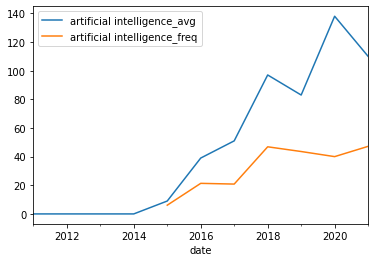

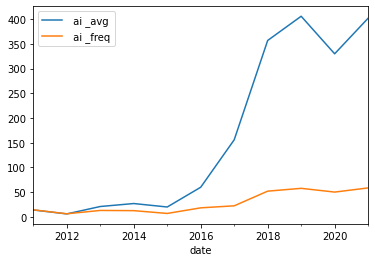

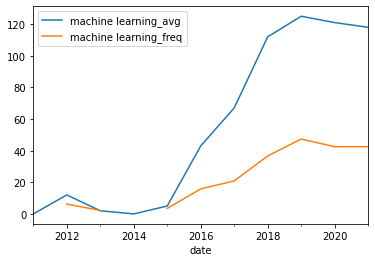

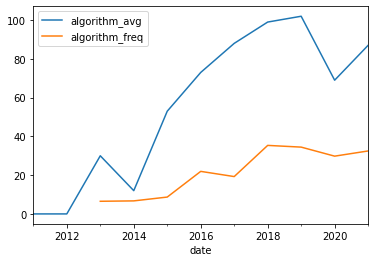

In [33]:
# Analyze
## How has the conversation about AI/ML changed over time? (Twitter frequency/average)
from web_observatory import analyze_twitter
avg, freq, total = analyze_twitter(words, terms = ["artificial intelligence", " ai ", "machine learning", "algorithm"])
## Where the term conservation is used
#, freq, total = analyze_twitter(words.loc[words['nature']>0], ["artificial intelligence", "machine learning"])

In [36]:
## Are certain organizations (and organization sizes) more likely to mention AI/ML? (Crawl)
from web_observatory import analyze_orgs
avg, freq = analyze_orgs(words, orgs = ["raresites", "davidsuzuki", "grandriver", "wwf", "ecotrust", "natureconservancy"], terms = ["artificial intelligence", "forest", "machine learning"])
## Are certain organizations more likely to mention ethics terms in conjunction with AI/ML? (Crawl)
avg, freq = analyze_orgs(words.loc[(words["algorithm"]>0) | (words["artificial intelligence"]>0) | (words[" ai "]>0) | (words["machine learning"]>0)], orgs = ["raresites", "davidsuzuki", "grandriver", "wwf", "ecotrust", "natureconservancy"], terms = ["privacy", "surveillance"])
avg

2022-06-27 13:48:26 [py.warnings] WARNING: /Users/enost/Downloads/observatory_dev_v02.py:1213: RuntimeWarning: invalid value encountered in long_scalars
  for t in terms:

2022-06-27 13:48:26 [py.warnings] WARNING: /Users/enost/Downloads/observatory_dev_v02.py:1220: RuntimeWarning: invalid value encountered in long_scalars
  m = m[t].count() # Count the number of pages (links) the term was mentioned at least once



,privacy_avg,surveillance_avg
raresites,NaN,NaN
davidsuzuki,10.0,0.0
grandriver,NaN,NaN
wwf,9.43,33.96
ecotrust,0.0,0.0
natureconservancy,0.0,0.0


 ai  algorithm
Zeros: 23084, 93%
algorithm but not  ai : 321, 1%
 ai  but not algorithm: 833, 3%
Together: 572, 2%




,ai,algorithm
ai,1.00000,0.12221
algorithm,0.12221,1.00000


<AxesSubplot:xlabel=' ai ', ylabel='algorithm'>

algorithm  ai 
Zeros: 23084, 93%
 ai  but not algorithm: 833, 3%
algorithm but not  ai : 321, 1%
Together: 572, 2%




,algorithm,ai
algorithm,1.00000,0.12221
ai,0.12221,1.00000


<AxesSubplot:xlabel='algorithm', ylabel=' ai '>

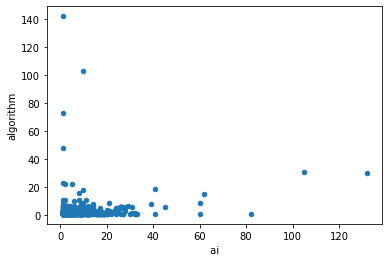

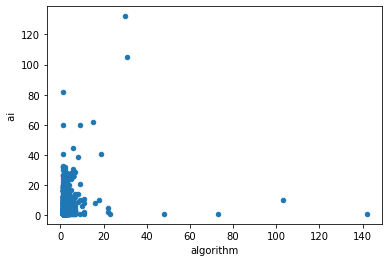

In [38]:
## Are certain topics associated with other (e.g. forest and AI vs mountain and AI?) (Twitter, Google, and Crawl)
from web_observatory import analyze_term_correlations
#analyze_term_correlations(words, ["artificial intelligence", "river", " ai "])
analyze_term_correlations(words, [" ai ", "algorithm"])